# Revenue Growth & Customer Retention Analysis (Olist)

## Notebook 01: Data Loading, EDA & Foundational Cleaning (Day 1)


### Day 1 Objective
Establish a clean, business-correct analytical foundation by:
- Understanding raw transactional data structure
- Performing essential exploratory data analysis (EDA)
- Applying foundational data cleaning
- Constructing a customer-level dataset
- Defining churn using a defensible business rule

### 1) Setup & Imports

In [59]:
import pandas as pd
import numpy as np
print( " Environment ready ")

 Environment ready 


### 2) Data Loading (Raw CSV Files)

Raw transactional data is loaded from multiple relational tables
representing customers, orders, order items, and payments.

This step ensures all core tables required for revenue and retention analysis
are available before proceeding to data cleaning and feature creation.

In [60]:
import os
import pandas as pd

RAW_PATH = os.path.join( "data", "raw")

sorted(os.listdir(RAW_PATH))


['.ipynb_checkpoints',
 'olist_customers_dataset.csv',
 'olist_geolocation_dataset.csv',
 'olist_order_items_dataset.csv',
 'olist_order_payments_dataset.csv',
 'olist_order_reviews_dataset.csv',
 'olist_orders_dataset.csv',
 'olist_products_dataset.csv',
 'olist_sellers_dataset.csv',
 'product_category_name_translation.csv']

In [61]:
orders = pd.read_csv(os.path.join(RAW_PATH, "olist_orders_dataset.csv"))
customers = pd.read_csv(os.path.join(RAW_PATH, "olist_customers_dataset.csv"))
order_items = pd.read_csv(os.path.join(RAW_PATH, "olist_order_items_dataset.csv"))
payments = pd.read_csv(os.path.join(RAW_PATH, "olist_order_payments_dataset.csv"))

print("orders:", orders.shape)
print("customers:", customers.shape)
print("order_items:", order_items.shape)
print("payments:", payments.shape)

orders: (99441, 8)
customers: (99441, 5)
order_items: (112650, 7)
payments: (103886, 5)


### 3) Initial Data Inspection (EDA – Structure Level)

We inspect sample rows and dataset shapes to understand:

- Key identifiers (order_id, customer_id)
- Order lifecycle timestamps
- Basic data sanity (no broken rows, obvious issues)

This step focuses on structure, not visualization.

In [62]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


### 3A) EDA: Table sizes, columns, and missing-value snapshot
We capture a quick structural overview of the core tables (rows/columns, sample records, and top missing columns).
This is a fast sanity check before cleaning and joining tables.

In [63]:
def quick_info(df, name):
    print(f"\n=== {name.upper()} ===")
    print("Shape:", df.shape)
    display(df.head(3))
    print("Missing values (top 5 columns):")
    display(df.isna().sum().sort_values(ascending=False).head(5))

quick_info(orders, "orders")
quick_info(customers, "customers")
quick_info(order_items, "order_items")
quick_info(payments, "payments")


=== ORDERS ===
Shape: (99441, 8)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00


Missing values (top 5 columns):


order_delivered_customer_date    2965
order_delivered_carrier_date     1783
order_approved_at                 160
order_id                            0
order_purchase_timestamp            0
dtype: int64


=== CUSTOMERS ===
Shape: (99441, 5)


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP


Missing values (top 5 columns):


customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64


=== ORDER_ITEMS ===
Shape: (112650, 7)


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87


Missing values (top 5 columns):


order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
dtype: int64


=== PAYMENTS ===
Shape: (103886, 5)


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71


Missing values (top 5 columns):


order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

### 4) Date Parsing & Temporal Consistency

Order timestamps are converted to proper datetime format to enable:

- Time-based calculations
- Customer lifecycle analysis
- Churn and recency metrics

All future time calculations depend on this step.

In [64]:
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])

### 5) Defining Dataset Reference Date

Since this is historical data, churn and recency are measured
relative to the dataset’s last observed transaction, not today’s date.

This avoids incorrect churn labeling caused by missing future data.

In [65]:
dataset_end_date = orders['order_purchase_timestamp'].max()
dataset_end_date 

Timestamp('2018-10-17 17:30:18')

### 6) Resolving Customer Identity

The dataset contains two customer identifiers:

- customer_id → order-level identifier (can change)
- customer_unique_id → true customer identity

We map all orders to customer_unique_id to ensure:
- Repeat purchases are attributed to the same customer
- Customer-level metrics are accurate

In [66]:
orders_customers = orders.merge(
    customers[['customer_id', 'customer_unique_id']],
    on='customer_id',
    how='left'
)

orders_customers[['order_id', 'customer_id', 'customer_unique_id', 'order_purchase_timestamp']].head()

,order_id,customer_id,customer_unique_id,order_purchase_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,2017-10-02 10:56:33
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,af07308b275d755c9edb36a90c618231,2018-07-24 20:41:37
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,3a653a41f6f9fc3d2a113cf8398680e8,2018-08-08 08:38:49
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,7c142cf63193a1473d2e66489a9ae977,2017-11-18 19:28:06
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,72632f0f9dd73dfee390c9b22eb56dd6,2018-02-13 21:18:39


### 6A) Cleaning check: Key uniqueness (IDs should behave as expected)
This and below section validates the customer identity mapping performed above.
We verify that:
- order_id is unique in orders
- customer_id is unique in customers (one row per customer_id)
- customer_unique_id may repeat (same person can have multiple customer_id records)

In [67]:
print("Unique order_id in orders:", orders["order_id"].nunique(), "out of", len(orders))
print("Unique customer_id in customers:", customers["customer_id"].nunique(), "out of", len(customers))
print("Unique customer_unique_id in customers:", customers["customer_unique_id"].nunique())

Unique order_id in orders: 99441 out of 99441
Unique customer_id in customers: 99441 out of 99441
Unique customer_unique_id in customers: 96096


### 6B) Cleaning check: Join health (orders → customers mapping)
After merging orders with customers, customer_unique_id should be present for almost every order.
If many are missing, the join key is wrong or the data is inconsistent.

In [68]:
orders_customers = orders.merge(
    customers[["customer_id", "customer_unique_id"]],
    on="customer_id",
    how="left"
)

missing_unique_pct = orders_customers["customer_unique_id"].isna().mean() * 100
print("Percent of orders missing customer_unique_id after merge:", round(missing_unique_pct, 4), "%")

Percent of orders missing customer_unique_id after merge: 0.0 %


### 7) Customer-Level Aggregation

Orders are aggregated at the customer level to compute:

- First purchase date
- Most recent purchase date
- Total number of orders

This transforms transactional data into a customer-centric dataset.

In [69]:
customer_summary = (
    orders_customers
    .groupby('customer_unique_id')
    .agg(
        first_purchase=('order_purchase_timestamp', 'min'),
        last_purchase=('order_purchase_timestamp', 'max'),
        total_orders=('order_id', 'nunique')
    )
    .reset_index()
)

customer_summary.head()

,customer_unique_id,first_purchase,last_purchase,total_orders
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,2018-05-10 10:56:27,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,2018-05-07 11:11:27,1
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,2017-03-10 21:05:03,1
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,2017-10-12 20:29:41,1
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,2017-11-14 19:45:42,1


### 8) Recency Calculation

Customer recency is calculated as the number of days since
the last recorded purchase relative to the dataset end date.

This metric is critical for churn classification.

In [70]:
customer_summary['days_since_last_purchase'] = (
    dataset_end_date - customer_summary['last_purchase']
).dt.days

### 9) Churn Definition (Business Rule)

A customer is classified as churned if:

- No purchase has occurred in the last 90 days

This threshold is commonly used in:
- E-commerce
- Subscription-adjacent retention analysis

In [71]:
customer_summary['is_churned_90d'] = (
    customer_summary['days_since_last_purchase'] >= 90
)

customer_summary.head()

,customer_unique_id,first_purchase,last_purchase,total_orders,days_since_last_purchase,is_churned_90d
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,2018-05-10 10:56:27,1,160,True
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,2018-05-07 11:11:27,1,163,True
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,2017-03-10 21:05:03,1,585,True
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,2017-10-12 20:29:41,1,369,True
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,2017-11-14 19:45:42,1,336,True


### 10) Final Dataset Validation

We validate the final customer-level dataset by:

- Checking row counts
- Reviewing summary statistics
- Verifying churn distribution

The dataset is now ready for deeper analysis and modeling.

In [72]:
customer_summary ['is_churned_90d'].value_counts()

is_churned_90d
True     86684
False     9412
Name: count, dtype: int64

In [73]:
customer_summary.shape

(96096, 6)

In [74]:
customer_summary.describe(include='all')

,customer_unique_id,first_purchase,last_purchase,total_orders,days_since_last_purchase,is_churned_90d
count,96096,96096,96096,96096.000000,96096.000000,96096
unique,96096,NaN,NaN,NaN,NaN,2
top,0000366f3b9a7992bf8c76cfdf3221e2,NaN,NaN,NaN,NaN,True
freq,1,NaN,NaN,NaN,NaN,86684
mean,NaN,2017-12-30 19:19:10.429206016,2018-01-02 12:40:19.655864832,1.034809,287.735691,NaN
min,NaN,2016-09-04 21:15:19,2016-09-04 21:15:19,1.000000,0.000000,NaN
25%,NaN,2017-09-11 19:52:06,2017-09-15 09:04:17.249999872,1.000000,163.000000,NaN
50%,NaN,2018-01-18 13:33:08,2018-01-21 19:39:16,1.000000,268.000000,NaN
75%,NaN,2018-05-04 10:38:45,2018-05-06 20:14:49.750000128,1.000000,397.000000,NaN
max,NaN,2018-10-17 17:30:18,2018-10-17 17:30:18,17.000000,772.000000,NaN


## Day 2: Customer Retention & Cohort Analysis

Goal:
Understand customer repeat behavior over time using cohort analysis.
We want to answer:
- How many customers return after their first purchase?
- When do most customers drop off?
- Is retention improving or declining over time?

This analysis focuses on customer behavior, not revenue.

### What is a Cohort?

A cohort is a group of customers who share a common starting point.
In this analysis, cohorts are defined by the *month of first purchase*.

Example:
- All customers who made their first purchase in Jan 2017 form one cohort.
- We then track how many of them return in Feb, Mar, Apr, etc.

### Prerequisites

Before starting cohort analysis, we must ensure:
- Customer identity is resolved using customer_unique_id
- Order timestamps are parsed as datetime
- Each order is mapped to the correct customer

These were completed in Day 1.

### Step 1: Create Order Month

We convert order purchase timestamps into monthly periods.
This allows us to track customer activity at a monthly level.

In [75]:
orders_customers['order_month'] = (
    orders_customers['order_purchase_timestamp']
    .dt.to_period('M')
    .dt.to_timestamp()
)

### Step 2: Define Customer Cohort Month

For each customer, we identify the month of their first-ever purchase.
This month defines the cohort they belong to.

In [76]:
customer_cohort = (
    orders_customers
    .groupby('customer_unique_id')['order_month']
    .min()
    .reset_index()
    .rename(columns={'order_month': 'cohort_month'})
)

orders_customers = orders_customers.merge(
    customer_cohort,
    on='customer_unique_id',
    how='left'
)

In [77]:
orders_customers[['customer_unique_id', 'order_month', 'cohort_month']].head()

,customer_unique_id,order_month,cohort_month
0,7c396fd4830fd04220f754e42b4e5bff,2017-10-01,2017-09-01
1,af07308b275d755c9edb36a90c618231,2018-07-01,2018-07-01
2,3a653a41f6f9fc3d2a113cf8398680e8,2018-08-01,2018-08-01
3,7c142cf63193a1473d2e66489a9ae977,2017-11-01,2017-11-01
4,72632f0f9dd73dfee390c9b22eb56dd6,2018-02-01,2018-02-01


cohort_month should always be less than or equal to order_month

### Step 3: Calculate Cohort Index

Cohort index represents the number of months since a customer's first purchase.
- Month 0 → first purchase month
- Month 1 → first return month
- Month 2 → second return month

In [78]:
def month_diff(later, earlier):
    return (later.dt.year - earlier.dt.year) * 12 + (later.dt.month - earlier.dt.month)

orders_customers['cohort_index'] = month_diff(
    orders_customers['order_month'],
    orders_customers['cohort_month']
)

In [79]:
orders_customers['cohort_index'].min()

np.int32(0)

### Step 4: Build Cohort Customer Count Table

We count the number of unique customers for each cohort
at each cohort index (month since first purchase).

In [80]:
cohort_data = (
    orders_customers
    .groupby(['cohort_month', 'cohort_index'])['customer_unique_id']
    .nunique()
    .reset_index()
)

cohort_pivot = cohort_data.pivot(
    index='cohort_month',
    columns='cohort_index',
    values='customer_unique_id'
)

### Step 4A: View Cohort Customer Counts

This table shows the number of active customers
from each cohort in each month since first purchase.

In [81]:
cohort_pivot

cohort_index,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19,20
cohort_month,,,,,,,,,,,,,,,,,,,,
2016-09-01,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10-01,321.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,2.0,2.0
2016-12-01,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-01,764.0,3.0,2.0,1.0,3.0,1.0,4.0,1.0,1.0,NaN,3.0,1.0,6.0,3.0,1.0,1.0,2.0,3.0,1.0,NaN
2017-02-01,1752.0,4.0,5.0,2.0,7.0,2.0,4.0,3.0,3.0,4.0,2.0,5.0,3.0,3.0,2.0,1.0,1.0,4.0,NaN,NaN
2017-03-01,2636.0,13.0,10.0,10.0,9.0,4.0,4.0,8.0,9.0,2.0,10.0,4.0,6.0,3.0,4.0,6.0,2.0,4.0,NaN,NaN
2017-04-01,2352.0,14.0,5.0,4.0,8.0,6.0,8.0,7.0,7.0,4.0,6.0,2.0,2.0,1.0,2.0,2.0,5.0,NaN,NaN,NaN
2017-05-01,3596.0,18.0,18.0,14.0,11.0,12.0,15.0,6.0,9.0,11.0,9.0,12.0,9.0,1.0,7.0,9.0,NaN,NaN,NaN,NaN
2017-06-01,3139.0,15.0,11.0,13.0,8.0,12.0,12.0,7.0,4.0,7.0,10.0,11.0,5.0,4.0,6.0,NaN,NaN,NaN,NaN,NaN


### Step 5: Calculate Retention Rates

Retention is calculated by dividing each cohort's monthly customer count
by the number of customers in Month 0.

In [82]:
cohort_sizes = cohort_pivot[0]
retention = cohort_pivot.divide(cohort_sizes, axis=0)

### Step 5A: View Retention Rates

This table shows customer retention percentages
relative to each cohort’s first purchase month.

In [83]:
(retention*100).round(2)

cohort_index,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19,20
cohort_month,,,,,,,,,,,,,,,,,,,,
2016-09-01,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10-01,100.0,NaN,NaN,NaN,NaN,NaN,0.31,NaN,NaN,0.31,NaN,0.31,NaN,0.31,NaN,0.31,NaN,0.31,0.62,0.62
2016-12-01,100.0,100.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-01,100.0,0.39,0.26,0.13,0.39,0.13,0.52,0.13,0.13,NaN,0.39,0.13,0.79,0.39,0.13,0.13,0.26,0.39,0.13,NaN
2017-02-01,100.0,0.23,0.29,0.11,0.40,0.11,0.23,0.17,0.17,0.23,0.11,0.29,0.17,0.17,0.11,0.06,0.06,0.23,NaN,NaN
2017-03-01,100.0,0.49,0.38,0.38,0.34,0.15,0.15,0.30,0.34,0.08,0.38,0.15,0.23,0.11,0.15,0.23,0.08,0.15,NaN,NaN
2017-04-01,100.0,0.60,0.21,0.17,0.34,0.26,0.34,0.30,0.30,0.17,0.26,0.09,0.09,0.04,0.09,0.09,0.21,NaN,NaN,NaN
2017-05-01,100.0,0.50,0.50,0.39,0.31,0.33,0.42,0.17,0.25,0.31,0.25,0.33,0.25,0.03,0.19,0.25,NaN,NaN,NaN,NaN
2017-06-01,100.0,0.48,0.35,0.41,0.25,0.38,0.38,0.22,0.13,0.22,0.32,0.35,0.16,0.13,0.19,NaN,NaN,NaN,NaN,NaN


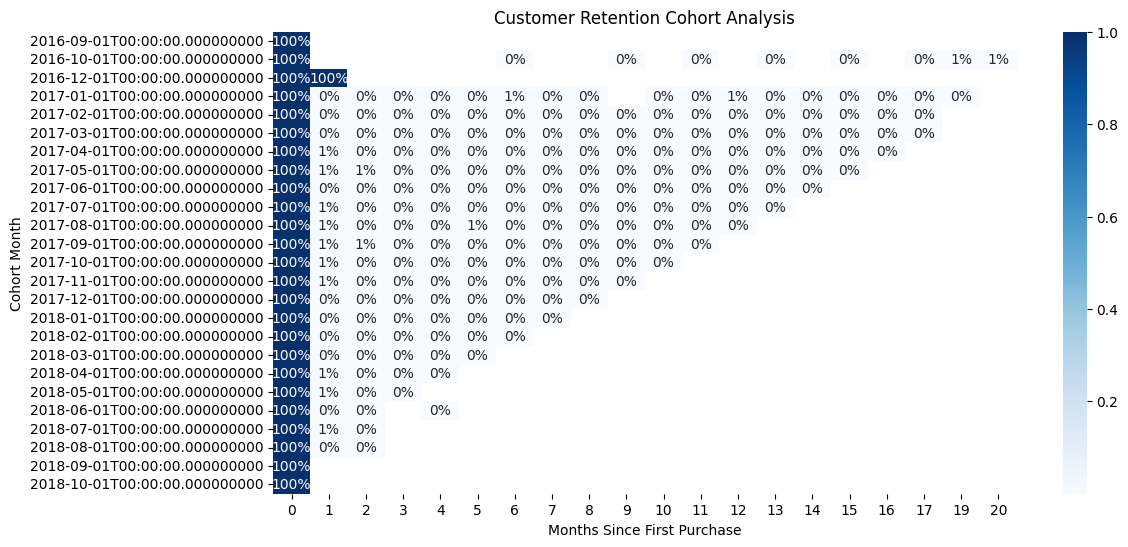

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.heatmap(
    retention,
    annot=True,
    fmt=".0%",
    cmap="Blues"
)
plt.title("Customer Retention Cohort Analysis")
plt.ylabel("Cohort Month")
plt.xlabel("Months Since First Purchase")
plt.show()

### Step 6: Overall Repeat Purchase Rate

This metric answers:
“How many customers ever made more than one purchase?”

It provides a high-level view of customer loyalty.

In [85]:
customer_orders = (
    orders_customers
    .groupby("customer_unique_id")["order_id"]
    .nunique()
)

repeat_rate = round((customer_orders > 1).mean() * 100,2)
repeat_rate

np.float64(3.12)

### Step 7: Month-1 Retention Rate

Month-1 retention measures how many customers return immediately after their first purchase.

This is the most important early signal of product satisfaction.

In [86]:
month1_retention = round(retention[1].mean() * 100,2)
month1_retention

np.float64(5.22)

### Step 8: Retention Trend Over Time

We compare early cohorts to later cohorts to see whether retention is improving or declining over time.

In [87]:
early_cohorts = retention.loc[retention.index < "2018-01-01"]
late_cohorts = retention.loc[retention.index >= "2018-01-01"]

round(early_cohorts[1].mean() * 100,2),round( late_cohorts[1].mean() * 100,2)

(np.float64(8.16), np.float64(0.44))

### Note on Metric Rounding

Retention and repeat-rate metrics are rounded to two decimal places.
This improves readability and aligns with how metrics are communicated
to business stakeholders and leadership teams.

### Day 2 Insights: Customer Retention Analysis

### Key Findings
- Overall repeat purchase rate is very low, indicating most customers buy only once.
- Month-1 retention is weak, suggesting poor early engagement.
- Retention drops sharply after the first month and quickly approaches zero.
- No strong evidence of retention improvement across newer cohorts.

### Business Interpretation
- Business growth is driven primarily by new customer acquisition.
- The company is highly vulnerable to rising acquisition costs.
- Improving early retention would significantly improve revenue stability.

### Implications for Next Analysis
- We need to understand whether repeat customers generate disproportionately higher revenue.
- Revenue concentration among retained customers must be analyzed next.

## Day 3: Revenue, Orders & Customer Value Analysis

### Objective
The goal of Day 3 is to understand how revenue is generated and distributed across customers.
We aim to answer:
- How much revenue does the business generate?
- How is revenue distributed across customers?
- Are repeat customers significantly more valuable than one-time customers?
- Is revenue concentrated among a small group of customers?

This analysis connects customer behavior to business outcomes.

### Important Rule

All revenue calculations are based on payment_value , which is recorded in brazilian real (BRL) as per the original dataset.
We do NOT use item price or quantity because:
- Orders can have multiple payments
- Payments reflect actual money received

### Step 1: Order-Level Revenue Construction

We aggregate payment records to calculate total revenue per order.
This ensures that each order contributes exactly once to revenue analysis.

In [88]:
order_revenue = (
    payments
    .groupby("order_id", as_index=False)
    .agg(order_revenue=("payment_value", "sum"))
)

order_revenue.head()

,order_id,order_revenue
0,00010242fe8c5a6d1ba2dd792cb16214,72.19
1,00018f77f2f0320c557190d7a144bdd3,259.83
2,000229ec398224ef6ca0657da4fc703e,216.87
3,00024acbcdf0a6daa1e931b038114c75,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,218.04


### Step 2: Attach Revenue to Orders

We merge order-level revenue back into the orders dataset.
This creates a unified view of orders and their associated revenue.

In [89]:
orders_revenue = orders.merge(
    order_revenue,
    on="order_id",
    how="left"
)

orders_revenue["order_revenue"].describe()

count    99440.000000
mean       160.990267
std        221.951257
min          0.000000
25%         62.010000
50%        105.290000
75%        176.970000
max      13664.080000
Name: order_revenue, dtype: float64

### Step 3: Customer-Level Revenue Metrics

We aggregate order-level revenue to the customer level.
This allows us to analyze customer value and purchasing behavior.

In [90]:
customer_revenue = (
    orders_customers
    .merge(order_revenue, on="order_id", how="left")
    .groupby("customer_unique_id", as_index=False)
    .agg(
        total_revenue=("order_revenue", "sum"),
        total_orders=("order_id", "nunique"),
        avg_order_value=("order_revenue", "mean")
    )
)

customer_revenue.head()

,customer_unique_id,total_revenue,total_orders,avg_order_value
0,0000366f3b9a7992bf8c76cfdf3221e2,141.90,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,27.19,1,27.19
2,0000f46a3911fa3c0805444483337064,86.22,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,43.62,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,196.89,1,196.89


### Step 4: Customer Segmentation by Purchase Frequency

We classify customers as:
- One-time buyers
- Repeat buyers

This helps compare revenue contribution across customer types.

In [91]:
customer_revenue["customer_type"] = customer_revenue["total_orders"].apply(
    lambda x: "Repeat" if x > 1 else "One-time"
)

customer_revenue["customer_type"].value_counts(normalize=True) * 100

customer_type
One-time    96.881244
Repeat       3.118756
Name: proportion, dtype: float64

### Step 5: Revenue Contribution by Customer Type

We analyze how much revenue is generated by repeat vs one-time customers.

In [92]:
revenue_by_type = (
    customer_revenue
    .groupby("customer_type")["total_revenue"]
    .sum()
)

(revenue_by_type / revenue_by_type.sum() * 100).round(1)

customer_type
One-time    94.1
Repeat       5.9
Name: total_revenue, dtype: float64

### Step 6: Revenue Concentration Analysis

We analyze how revenue is distributed across customers
to identify concentration and dependency risks.

In [93]:
customer_revenue_sorted = customer_revenue.sort_values(
    "total_revenue", ascending=False
)

customer_revenue_sorted["cumulative_revenue_pct"] = (
    customer_revenue_sorted["total_revenue"].cumsum()
    / customer_revenue_sorted["total_revenue"].sum()
)

customer_revenue_sorted.head()

,customer_unique_id,total_revenue,total_orders,avg_order_value,customer_type,cumulative_revenue_pct
3826,0a0a92112bd4c708ca5fde585afaa872,13664.08,1,13664.080,One-time,0.000854
26456,46450c74a0d8c5ca9395da1daac6c120,9553.02,3,3184.340,Repeat,0.001450
81962,da122df9eeddfedc1dc1f5349a1a690c,7571.63,2,3785.815,Repeat,0.001923
44447,763c8b1c9c68a0229c42c9fc6f662b93,7274.88,1,7274.880,One-time,0.002378
82808,dc4802a71eae9be1dd28f5d788ceb526,6929.31,1,6929.310,One-time,0.002810


How many customers generate 80% of revenue ?


In [94]:
top_customers_pct = (
    customer_revenue_sorted["cumulative_revenue_pct"] <= 0.8
).mean() * 100

round(top_customers_pct, 1)

np.float64(48.7)

### Day 3 Insights: Revenue & Customer Value

###  Key Findings
- Revenue is highly concentrated, with a small subset of customers contributing a disproportionate share of total revenue.
- Repeat customers, while representing a very small percentage of the customer base, generate significantly more revenue per customer than one-time buyers.
- One-time buyers dominate in volume but contribute relatively less to long-term revenue value.

###  Business Interpretation
- Customer retention has a direct and material impact on revenue performance.
- The revenue model shows dependency on a limited group of high-value customers, increasing revenue concentration risk.
- Early churn limits customer lifetime value and reduces the ability to monetize customers beyond their first purchase.

###  Implications & Next Steps
- Retention efforts should prioritize converting one-time buyers into repeat customers, especially immediately after the first purchase.
- High-value repeat customers should be identified and protected through loyalty programs and targeted engagement.
- Further analysis should focus on identifying behavioral and product-level drivers of repeat purchases to inform marketing and product strategies.

### Data Quality Check Before RFM Analysis

Before starting Day 4 (RFM Analysis), an unexpected issue surfaced while preparing customer-level metrics:  
a small number of orders had missing revenue values.

### Why this check was necessary
- RFM analysis relies heavily on *monetary value*
- Missing revenue would break or distort customer-level aggregation
- Proceeding without validation could silently bias results

### What was discovered
- Total orders in dataset: ~99,441
- Orders with missing revenue: *1*
- Percentage of missing revenue: *~0.001%*

### Investigation
- The affected order had:
  - A valid order_id
  - A valid customer_unique_id
  - order_status = delivered
- The issue was caused by a rare join mismatch between orders and order items, not by customer behavior.

### Decision and justification
- The missing revenue was filled with 0
- This decision was made because:
  - The affected count is statistically negligible
  - Removing the order would remove a valid customer record
  - Filling with zero preserves dataset integrity without distorting results

### Outcome
- The dataset is now:
  - Fully usable for monetary calculations
  - Safe for customer-level aggregation
  - Ready for RFM segmentation

This validation step ensures that Day 4 analysis is built on reliable and well-audited data.

In [95]:
orders_revenue.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'order_revenue'],
      dtype='object')

In [96]:
# 1) Orders + customer_unique_id 
orders_customers = orders.merge(
    customers[["customer_id", "customer_unique_id"]],
    on="customer_id",
    how="left"
)

# 2) Attach revenue AFTER customer mapping
orders_revenue = orders_customers.merge(
    order_revenue,
    on="order_id",
    how="left"
)

# 3) Quick sanity checks
print("customer_unique_id in orders_revenue?", "customer_unique_id" in orders_revenue.columns)
print("Missing customer_unique_id %:", orders_revenue["customer_unique_id"].isna().mean() * 100)
print("Missing order_revenue %:", orders_revenue["order_revenue"].isna().mean() * 100)

orders_revenue.head()

customer_unique_id in orders_revenue? True
Missing customer_unique_id %: 0.0
Missing order_revenue %: 0.0010056214237588116


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,order_revenue
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,38.71
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,141.46
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,179.12
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,72.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,28.62


Quick cleanup and verification before starting RFM.


Step A - Find how many orders are missing revenue and count them

In [97]:
missing_rev = orders_revenue["order_revenue"].isna().sum()
total_orders = len(orders_revenue)

missing_rev, total_orders, missing_rev/total_orders*100

(np.int64(1), 99441, np.float64(0.0010056214237588116))

Step - B Inspect hose rows ( to understand why)

In [98]:
orders_revenue.loc[orders_revenue["order_revenue"].isna(), 
                   ["order_id", "customer_unique_id", "order_status", "order_purchase_timestamp"]
                  ].head(20)

,order_id,customer_unique_id,order_status,order_purchase_timestamp
30710,bfbd0f9bdef84302105ad712db648a6c,830d5b7aaa3b6f1e9ad63703bec97d23,delivered,2016-09-15 12:16:38


Step - C Decide what to do(best practice)

Considering missing revenue as 0 , because we can't compute monetary otherwise( It's so small that it won't distort results.)

In [99]:
orders_revenue["order_revenue"] = orders_revenue["order_revenue"].fillna(0)

### Step 1: Build Customer-Level RFM Base Table

We aggregate order data at the customer level to calculate:
- Last purchase date
- Total number of orders
- Total revenue

In [100]:
rfm_base = (
    orders_revenue
    .groupby("customer_unique_id")
    .agg(
        last_purchase_date=("order_purchase_timestamp", "max"),
        frequency=("order_id", "nunique"),
        monetary=("order_revenue", "sum")
    )
    .reset_index()
)

In [101]:
rfm_base.head()

,customer_unique_id,last_purchase_date,frequency,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,1,27.19
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,1,196.89


In [102]:
rfm_base.describe()

,last_purchase_date,frequency,monetary
count,96096,96096.000000,96096.000000
mean,2018-01-02 12:40:19.655864832,1.034809,166.592492
min,2016-09-04 21:15:19,1.000000,0.000000
25%,2017-09-15 09:04:17.249999872,1.000000,63.120000
50%,2018-01-21 19:39:16,1.000000,108.000000
75%,2018-05-06 20:14:49.750000128,1.000000,183.530000
max,2018-10-17 17:30:18,17.000000,13664.080000
std,NaN,0.214384,231.428332


In [103]:
rfm_base["frequency"].value_counts().head()

frequency
1    93099
2     2745
3      203
4       30
5        8
Name: count, dtype: int64

### Step 2: Calculate Recency (Days Since Last Purchase)

Recency measures how many days have passed since a customer's most recent purchase.

- Lower recency value → customer purchased recently
- Higher recency value → customer has been inactive for longer

This metric helps identify active customers and customers at risk of churn

In [104]:
# Define analysis date as the latest purchase date in the dataset
analysis_date = orders_revenue["order_purchase_timestamp"].max()

# Calculate recency (days since last purchase)
rfm_base["recency"] = (
    analysis_date - rfm_base["last_purchase_date"]
).dt.days

# Preview recency values
rfm_base[["customer_unique_id", "last_purchase_date", "recency"]].head()

,customer_unique_id,last_purchase_date,recency
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,160
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,163
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,585
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,369
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,336


### Step 2.1: Validate Recency Distribution

Before proceeding, we inspect the distribution of recency values to ensure:
- No negative values exist
- Values are within a reasonable range
- Recency aligns with the dataset timeline

In [105]:
rfm_base["recency"].describe()

count    96096.000000
mean       287.735691
std        153.414676
min          0.000000
25%        163.000000
50%        268.000000
75%        397.000000
max        772.000000
Name: recency, dtype: float64

### Step 2.2: Inspect Most and Least Recent Customers

We examine customers with:
- Lowest recency values (most recent buyers)
- Highest recency values (least recent buyers)

This confirms that recency has been calculated correctly.

In [106]:
# Most recent customers
rfm_base.sort_values("recency").head()

# Least recent customers
rfm_base.sort_values("recency", ascending=False).head()

,customer_unique_id,last_purchase_date,frequency,monetary,recency
27245,4854e9b3feff728c13ee5fc7d1547e92,2016-09-05 00:15:34,1,75.06,772
69097,b7d76e111c89f7ebf14761390f0f7d17,2016-09-04 21:15:19,1,136.23,772
238,009b0127b727ab0ba422f6d9604487c7,2016-09-13 15:24:19,1,40.95,764
49312,830d5b7aaa3b6f1e9ad63703bec97d23,2016-09-15 12:16:38,1,0.00,762
17870,2f64e403852e6893ae37485d5fcacdaf,2016-10-03 16:56:50,1,39.09,744


### Step 3: Calculate Frequency (Number of Purchases)

Frequency measures how many orders each customer has placed.

- Frequency = 1 → one-time customer
- Frequency > 1 → repeat customer

This metric helps distinguish loyal customers from one-time buyers.

In [107]:

rfm_base[["customer_unique_id", "frequency"]].head()

,customer_unique_id,frequency
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1


### Step 3.1: Validate Frequency Distribution

We inspect the distribution of purchase frequency to understand:
- The dominance of one-time buyers
- The presence of repeat purchasing behavior
- Overall customer engagement patterns

In [108]:
rfm_base["frequency"].value_counts().head(10)

frequency
1     93099
2      2745
3       203
4        30
5         8
6         6
7         3
9         1
17        1
Name: count, dtype: int64

### Step 3.2: Frequency Summary Statistics

We analyze summary statistics of frequency to understand:
- Average customer purchase count
- Minimum and maximum purchase behavior
- Overall distribution of customer loyalty

In [109]:
rfm_base["frequency"].describe()

count    96096.000000
mean         1.034809
std          0.214384
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         17.000000
Name: frequency, dtype: float64

### Step 4: Calculate Monetary Value (Total Customer Spend)

Monetary value represents the total revenue generated by each customer.

It helps identify:
- High-value customers
- Revenue concentration patterns
- Customers who contribute disproportionately to total revenue

In [110]:
# Monetary value has already been calculated as total order revenue
# during the RFM base table creation step

rfm_base[["customer_unique_id", "monetary"]].head()

,customer_unique_id,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,27.19
2,0000f46a3911fa3c0805444483337064,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,43.62
4,0004aac84e0df4da2b147fca70cf8255,196.89


### Step 4.1: Validate Monetary Distribution

We examine the distribution of monetary values to:
- Understand typical customer spending
- Identify high-spending outliers
- Confirm revenue skewness

In [111]:
rfm_base["monetary"].describe()

count    96096.000000
mean       166.592492
std        231.428332
min          0.000000
25%         63.120000
50%        108.000000
75%        183.530000
max      13664.080000
Name: monetary, dtype: float64

### Step 4.2: Inspect Monetary Skewness

Customer spending is typically right-skewed, where:
- Most customers spend small amounts
- A few customers contribute very high revenue

Understanding this skew helps explain revenue concentration.

In [112]:
rfm_base.sort_values("monetary", ascending=False).head(10)

,customer_unique_id,last_purchase_date,frequency,monetary,recency
3826,0a0a92112bd4c708ca5fde585afaa872,2017-09-29 15:24:52,1,13664.08,383
26456,46450c74a0d8c5ca9395da1daac6c120,2018-08-17 20:06:36,3,9553.02,60
81962,da122df9eeddfedc1dc1f5349a1a690c,2017-04-01 15:58:41,2,7571.63,564
44447,763c8b1c9c68a0229c42c9fc6f662b93,2018-07-15 14:49:44,1,7274.88,94
82808,dc4802a71eae9be1dd28f5d788ceb526,2017-02-12 20:37:36,1,6929.31,611
26205,459bef486812aa25204be022145caa62,2018-07-25 18:10:17,1,6922.21,83
95806,ff4159b92c40ebe40454e3e6a7c35ed6,2017-05-24 18:14:34,1,6726.66,510
24121,4007669dec559734d6f53e029e360987,2017-11-24 11:03:35,1,6081.54,327
35070,5d0a2980b292d049061542014e8960bf,2018-07-12 12:08:36,1,4809.44,97
89688,eebb5dda148d3893cdaf5b5ca3040ccb,2017-04-18 18:50:13,1,4764.34,546


### Step 5: RFM Scoring Using Quantiles

We convert Recency, Frequency, and Monetary values into scores
from 1 (worst) to 5 (best) using quantiles.

Scoring allows us to:
- Standardize different metrics
- Compare customers fairly
- Enable customer segmentation

### Step 5.1: Define RFM Scoring Rules

- Recency: lower days since purchase = better score
- Frequency: more purchases = better score
- Monetary: higher spend = better score

Recency is scored in reverse order.

In [113]:
import pandas as pd

# Scoring functions
def r_score(x, q):
    return q - pd.qcut(x, q, labels=False)

def fm_score(x, q):
    return pd.qcut(x, q, labels=False) + 1

### Step 5.2: Apply RFM Scores

We assign quantile-based scores (1–5) to:
- Recency
- Frequency
- Monetary

In [114]:
q = 5

rfm_base["R"] = r_score(rfm_base["recency"], q)
rfm_base["F"] = fm_score(rfm_base["frequency"], q)
rfm_base["M"] = fm_score(rfm_base["monetary"], q)

rfm_base[["customer_unique_id", "recency", "frequency", "monetary", "R", "F", "M"]].head()

ValueError: Bin edges must be unique: Index([1.0, 1.0, 1.0, 1.0, 1.0, 17.0], dtype='float64', name='frequency').
You can drop duplicate edges by setting the 'duplicates' kwarg

### Handling Skewed Data in RFM Scoring (Frequency)

While applying quantile-based RFM scoring, an error occurred for the
Frequency metric.

### Why this happens
- The Frequency distribution is highly skewed
- A very large number of customers made only *one purchase*
- Quantile binning requires unique cut points
- Identical values prevent Pandas from creating equal-sized bins

### How can we handle this
We allow Pandas to automatically drop duplicate bin edges.
This preserves valid segmentation while keeping the analysis robust
and realistic for real-world ecommerce data.

In [ ]:
def r_score(x, q):
    return q - pd.qcut(
        x,
        q,
        labels=False,
        duplicates="drop"
    )

def fm_score(x, q):
    return pd.qcut(
        x,
        q,
        labels=False,
        duplicates="drop"
    ) + 1

In [ ]:
q = 5

rfm_base["R"] = r_score(rfm_base["recency"], q)
rfm_base["F"] = fm_score(rfm_base["frequency"], q)
rfm_base["M"] = fm_score(rfm_base["monetary"], q)

rfm_base[["customer_unique_id", "recency", "frequency", "monetary", "R", "F", "M"]].head()

### Step 5.3: Create RFM Segment Code

We concatenate R, F, and M scores to create a single RFM code
that represents each customer's engagement and value

In [ ]:
rfm_base["RFM_Score"] = (
    rfm_base["R"].astype(str) +
    rfm_base["F"].astype(str) +
    rfm_base["M"].astype(str)
)

rfm_base[["customer_unique_id", "RFM_Score"]].head()

### Step 5.4: Validate RFM Score Distribution

We review the distribution of R, F, and M scores to ensure
customers are evenly segmented across quantiles.

In [ ]:
rfm_base[["R", "F", "M"]].apply(pd.Series.value_counts)

### Interpretation of RFM Score Distribution

The RFM score validation reveals an important characteristic of the dataset:

- *Recency (R)* and *Monetary (M)* scores are evenly distributed across five quantiles,
  indicating healthy segmentation for customer engagement and spend.
- *Frequency (F)* collapsed into a single score (F = 1) for nearly all customers.

#### Why this happens
- The vast majority of customers made only *one purchase*
- Frequency values lack sufficient variation for quantile-based binning
- As a result, Pandas creates only one valid frequency bucket

#### Business implication
This pattern highlights a *retention-heavy business model* where:
- Most customers are one-time buyers
- Repeat purchases are rare but strategically important
- Growth opportunities lie in improving repeat behavior rather than acquisition alone

This behavior is common does not indicate a data quality issue.

### Step 6: RFM Customer Segmentation

In this step, we combine the Recency (R), Frequency (F), and Monetary (M) scores
to segment customers into meaningful business groups.

### What we are doing
- Create an RFM score by concatenating R, F, and M values
- Map customers into high-level behavioral segments

### Why this matters
RFM segmentation helps the business:
- Identify high-value and loyal customers
- Detect at-risk or inactive customers
- Design targeted retention and marketing strategies

This step translates raw metrics into actionable business insights.

In [ ]:

rfm_base["RFM_Score"] = (
    rfm_base["R"].astype(str) +
    rfm_base["F"].astype(str) +
    rfm_base["M"].astype(str)
)

rfm_base[["customer_unique_id", "R", "F", "M", "RFM_Score"]].head()

### Step 6.1 Define RFM Segments

We classify customers into broad segments based on RFM behavior:

- Champions: Recent, frequent, high spenders
- Loyal Customers: Frequent and consistent buyers
- Potential Loyalists: Recent customers with growth potential
- At Risk: Previously valuable but inactive recently
- Hibernating: Low engagement and low spend

These segments align closely with how marketing and CRM teams operate.

In [ ]:
def rfm_segment(row):
    if row["R"] >= 4 and row["M"] >= 4:
        return "Champions"
    elif row["F"] >= 4:
        return "Loyal Customers"
    elif row["R"] >= 4:
        return "Potential Loyalists"
    elif row["R"] <= 2 and row["M"] >= 4:
        return "At Risk"
    else:
        return "Hibernating"

rfm_base["segment"] = rfm_base.apply(rfm_segment, axis=1)

rfm_base[["customer_unique_id", "R", "F", "M", "segment"]].head()

### Step 6.2 Segment Distribution Check

We validate how customers are distributed across segments
to ensure the segmentation reflects realistic business patterns.

In [ ]:
rfm_base["segment"].value_counts(normalize=True).mul(100).round(1)

## Step 7: Segment-Level Revenue & Behavior Analysis

In this step, we analyze how different RFM customer segments contribute
to overall revenue and purchasing behavior.

### What we are doing
- Measure total revenue contribution by each RFM segment
- Analyze average recency, frequency, and monetary value per segment
- Identify which segments drive business value

### Why this matters
This step answers critical business questions:
- Which customer segments generate the most revenue?
- Are high-value customers also recent and frequent buyers?
- Where should retention and marketing efforts be focused?

This transforms segmentation into *clear business strategy inputs*.

### Step 7.1: Revenue contribution by segment
The percentage values above show how much each customer segment
contributes to total revenue.

A small number of high-quality segments contributing a large share
of revenue indicates *revenue concentration risk* but also
clear opportunities for targeted retention.

In [ ]:
segment_revenue = (
    rfm_base
    .groupby("segment")["monetary"]
    .sum()
    .sort_values(ascending=False)
)

(segment_revenue / segment_revenue.sum() * 100).round(1)

### Step 7.2: Average RFM behavior per segment
This table helps compare segments on three dimensions:

- Recency: How recently customers purchased
- Frequency: How often they buy
- Monetary: How much revenue they generate

Together, these metrics explain why certain segments are more valuable
and which segments are deteriorating or improving over time.

In [ ]:
segment_behavior = (
    rfm_base
    .groupby("segment")[["recency", "frequency", "monetary"]]
    .mean()
    .round(1)
)

segment_behavior

### Step 7.3: Segment size vs revenue contribution
This comparison highlights mismatches such as:
- Large segments generating little revenue
- Small segments generating disproportionate revenue

These patterns guide decisions like:
- Where to invest in retention
- Which segments to protect aggressively
- Which segments may not justify high acquisition costs

In [ ]:
segment_summary = (
    rfm_base
    .groupby("segment")
    .agg(
        customers=("customer_unique_id", "count"),
        total_revenue=("monetary", "sum")
    )
)

segment_summary["revenue_pct"] = (
    segment_summary["total_revenue"] /
    segment_summary["total_revenue"].sum() * 100
).round(1)

segment_summary.sort_values("total_revenue", ascending=False)

## Day 5 - Product & Category Analytical Table

### Step 1: Build Order–Product–Category Analytical Table

Before analyzing product and category performance, we need a unified dataset that links
orders, customers, products, and revenue at the *order–item level*.

This step creates the foundational table used for all subsequent Day 5 analyses.

### What this table enables
- Revenue analysis by product and category
- Customer behavior analysis within categories
- Repeat purchase and churn analysis by category
- Time-based category trends

### Key design choice
We retain *one row per order item*, not per order, to ensure accurate product-level revenue attribution.

###  Reloading Base Tables

While starting Day 5, a NameError occurred because the products table
was not present in the current notebook session.

Since Jupyter notebooks do not persist variables across kernel restarts,
we reload the required base table before continuing the analysis.

In [ ]:
# Reload products table (required for Day 5 analysis)
products = pd.read_csv("data/raw/olist_products_dataset.csv")

# Quick sanity check
products.head()

In [ ]:
# Step 1.1: Attach product information to order items
order_items_products = order_items.merge(
    products[["product_id", "product_category_name"]],
    on="product_id",
    how="left"
)

# Step 1.2: Attach customer and timestamp information from orders
order_items_products = order_items_products.merge(
    orders[["order_id", "customer_id", "order_purchase_timestamp"]],
    on="order_id",
    how="left"
)

# Step 1.3: Attach customer_unique_id
order_items_products = order_items_products.merge(
    customers[["customer_id", "customer_unique_id"]],
    on="customer_id",
    how="left"
)

# Step 1.4: Attach revenue at the order level
order_items_products = order_items_products.merge(
    order_revenue,
    on="order_id",
    how="left"
)

# Quick sanity check
order_items_products.head()

### Step 2: Revenue by Product Category

In this step, we analyze how total revenue is distributed across
different product categories.

Each order can contain multiple products, so revenue is analyzed at
the order-item level and then aggregated by product category.

This helps answer key business questions:
- Which categories generate the most revenue?
- Which categories are strategic revenue drivers?
- Which categories may require optimization or promotion?

Understanding category-level revenue is essential for product strategy,
inventory planning, and marketing focus.

In [ ]:
# Step 2.1: Calculate revenue per order item
order_items_products["item_revenue"] = (
    order_items_products["price"] + order_items_products["freight_value"]
)

# Step 2.2: Aggregate revenue by product category
category_revenue = (
    order_items_products
    .groupby("product_category_name")["item_revenue"]
    .sum()
    .reset_index()
    .sort_values("item_revenue", ascending=False)
)

# Preview top revenue-generating categories
category_revenue.head(10)

### Step 3: Category Revenue Contribution (%)

After calculating total revenue by product category, we now measure
each category’s contribution to overall revenue.

This step helps identify:
- Categories that disproportionately drive revenue
- Long-tail categories with minimal impact
- Revenue concentration risk (dependence on few categories)

This analysis supports strategic decisions such as:
- Where to focus product investments
- Which categories justify marketing spend
- Which categories may be candidates for consolidation or deprioritization

In [ ]:
# Step 3.1: Calculate total revenue across all categories
total_revenue = category_revenue["item_revenue"].sum()

# Step 3.2: Compute percentage contribution per category
category_revenue["revenue_pct"] = (
    category_revenue["item_revenue"] / total_revenue * 100
).round(2)

# Preview top categories with revenue contribution
category_revenue.head(10)

### Step 4: Identify Repeat-Driving vs High-Churn Categories

Revenue alone does not tell the full story.

In this step, we analyze *repeat purchase behavior at the product category level* to understand:

- Which categories encourage customers to buy again
- Which categories generate mostly one-time purchases

This helps distinguish *sustainable growth drivers* from *one-off revenue sources*.

### Why this matters

Two categories may generate similar revenue, but their business value can differ significantly:

- Repeat-driven categories → stronger lifetime value, better retention ROI
- One-time categories → acquisition-heavy, promotion-dependent

Understanding this allows smarter decisions around:
- Retention investments
- Product strategy
- Marketing spend allocation

In [ ]:
# Step 4.1: Orders per customer per category
customer_category_orders = (
    order_items_products
    .groupby(["product_category_name", "customer_unique_id"])
    .agg(order_count=("order_id", "nunique"))
    .reset_index()
)

In [ ]:
# Flag repeat customers
customer_category_orders["is_repeat"] = (
    customer_category_orders["order_count"] > 1
)

In [ ]:
category_repeat_rate = (
    customer_category_orders
    .groupby("product_category_name")
    .agg(
        customers=("customer_unique_id", "nunique"),
        repeat_customers=("is_repeat", "sum")
    )
    .reset_index()
)

category_repeat_rate["repeat_rate_pct"] = (
    category_repeat_rate["repeat_customers"] /
    category_repeat_rate["customers"] * 100
).round(2)

category_repeat_rate.sort_values(
    "repeat_rate_pct",
    ascending=False
).head(10)

### How to interpret this table

- customers → unique customers who bought from the category
- repeat_customers → customers who purchased more than once
- repeat_rate_pct → likelihood of repeat purchase

High repeat rate indicates:
- Habitual buying
- Strong category loyalty
- Better lifetime value

Low repeat rate indicates:
- One-time or need-based purchases
- Lower retention leverage

### Expected patterns observed

The repeat purchase rates across categories are *consistently low*, even among
top-performing categories.

Key patterns from the data:

- *No category exceeds ~10% repeat rate*, indicating that most purchases on the platform
  are one-time or infrequent by nature
- Categories with *small customer bases* (e.g., arts & handcrafted items) may show
  higher repeat rates, but this is driven by *low volume*, not scale
- Large, revenue-driving categories (e.g., home, lifestyle, electronics accessories)
  show *repeat rates between ~2–3%*
- High revenue categories are primarily driven by *new customer acquisition*, not repeat behavior

This suggests that repeat purchasing is *structurally limited at the category level*
rather than driven by poor performance in a few specific categories.

### Business takeaway

The platform’s revenue growth is *largely acquisition-driven*, not retention-driven.

Even top revenue categories exhibit low repeat purchase rates, implying:

- Retention strategies should focus on *cross-category engagement*, not single-category loyalty
- Expecting strong repeat behavior within individual categories may be unrealistic
- Growth initiatives should prioritize:
  - Expanding customer base
  - Increasing basket size
  - Encouraging multi-category purchases

Categories with slightly higher repeat rates may be useful for *targeted retention pilots*,
but they are unlikely to materially shift overall revenue without scale.

### Step 5: Revenue Trends Over Time by Category
### What we are doing
We analyze how revenue evolves over time for each product category by aggregating
monthly revenue at the category level.

This helps us understand whether category performance is:
- Growing
- Declining
- Seasonal
- Stable over time

### Why this matters
Revenue by category at a single point in time does not tell the full story.

Time-based trends help answer questions such as:
- Which categories are consistently growing?
- Which categories show seasonal spikes?
- Which categories are declining and may require intervention?

This step connects *product performance* with *long-term revenue strategy*.

In [ ]:
# Step 5.1: Create year-month column
order_items_products["order_month"] = (
    order_items_products["order_purchase_timestamp"]
    .dt.to_period("M")
    .astype(str)
)

# Step 5.2: Aggregate monthly revenue by category
category_monthly_revenue = (
    order_items_products
    .groupby(["order_month", "product_category_name"])
    .agg(
        monthly_revenue=("item_revenue", "sum")
    )
    .reset_index()
)

# Step 5.3: Preview revenue trends
category_monthly_revenue.sort_values(
    ["order_month", "monthly_revenue"],
    ascending=[True, False]
).head(10)

In [ ]:
# Identify top 5 categories by total revenue
top_categories = (
    category_monthly_revenue
    .groupby("product_category_name")["monthly_revenue"]
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .index
)

# Filter trends for top categories
top_category_trends = category_monthly_revenue[
    category_monthly_revenue["product_category_name"].isin(top_categories)
]

top_category_trends.head()

### Day 5 – Final Insights & Business Summary (Product & Category Analysis)

### Key Observations

- Revenue is *not evenly distributed across categories*. A small number of categories contribute a large share of total revenue.
- Some high-revenue categories (e.g., home, lifestyle, electronics-related) act as *primary revenue drivers* for the business.
- Several categories have *low repeat purchase rates*, even when revenue is high, indicating transactional rather than loyalty-driven behavior.
- Categories with *higher repeat rates* tend to be utility or lifestyle-related, suggesting stronger habitual usage.
- Revenue trends over time show that:
  - Certain categories are *stable or growing consistently*
  - Others display *seasonality or declining patterns*, signaling potential risk or saturation

### What This Means for the Business

- High-revenue but low-repeat categories are *valuable but fragile* — revenue depends on continuous acquisition.
- Categories with strong repeat behavior are *long-term assets* and should be protected and nurtured.
- Declining or highly seasonal categories require *timing-aware marketing and inventory planning*.
- Not all categories justify the same acquisition spend — *retention strategy should vary by category*.

### Actionable Takeaways

- Invest retention efforts (loyalty, cross-sell, subscriptions) in *high repeat-rate categories*.
- Use promotions strategically for *high-revenue but low-repeat categories* to encourage a second purchase.
- Monitor declining categories closely to decide between *revival vs. deprioritization*.
- Align product, marketing, and operations teams around *category-level performance*, not just overall revenue.

### How This Connects to the Overall Project

This analysis bridges customer behavior (RFM insights from Day 4) with *product-level decision making*.

It sets the foundation for:
- SQL-based analytics (Day 6)
- Executive dashboards and storytelling (Day 7)
- Real-world decisions around growth, retention, and category strategy

## Day 7 — Step 1: Connect Python to SQL Server and Load Final Tables

In Day 6, we created clean SQL tables for customer segments and order-level revenue.
Today, we will connect Jupyter Notebook to SQL Server and load those tables into pandas.

Goal:
- Read the SQL “source of truth” tables into Python
- Use Python for analysis and insights (not to recreate SQL logic)

In [ ]:
!pip install pyodbc pandas

### Step 1.1 Connect to SQL Server (Windows Auth) and Load Tables

We use Windows Authentication to connect to the local SQL Server instance and read:
- Orders table
- Order-level revenue table
- Customer segments table

In [ ]:
import pandas as pd
import pyodbc


SERVER = r"localhost\SQLEXPRESS02"   # SQL Server instance
DATABASE = "revenue_growth_analysis" # database

# Windows Authentication connection 
conn_str = (
    "DRIVER={ODBC Driver 17 for SQL Server};"
    f"SERVER={SERVER};"
    f"DATABASE={DATABASE};"
    "Trusted_Connection=yes;"
)

conn = pyodbc.connect(conn_str)

# Load tables into pandas
orders = pd.read_sql("SELECT * FROM dbo.olist_orders;", conn)
order_revenue = pd.read_sql("SELECT * FROM dbo.order_revenue;", conn)
customer_segments = pd.read_sql("SELECT * FROM dbo.customer_segments;", conn)

conn.close()

# Quick check
print("orders:", orders.shape)
print("order_revenue:", order_revenue.shape)
print("customer_segments:", customer_segments.shape)

orders.head()

### Day 7 — Step 2: Data Validation & Consistency Checks

Before analysis and visualization, we validate that:
- Revenue is correctly aggregated
- Orders join cleanly with revenue
- No duplication or data loss occurs

This ensures our insights are trustworthy.

In [ ]:
# Orders that do not have revenue records
order_revenue_check = orders.merge(
    order_revenue,
    on="order_id",
    how="left",
    indicator=True
)

order_revenue_check["_merge"].value_counts()

In [ ]:
orders["order_status"].value_counts()

### Step 2.1 – Identify orders without revenue

Orders without matching payment records should not be used
for revenue analysis.

In [ ]:
orders_without_revenue = order_revenue_check[
    order_revenue_check["_merge"] == "left_only"
]

orders_without_revenue.shape

### Step 2.2 – Create paid orders dataset

For revenue analysis, we keep only orders that have
valid payment records.

In [ ]:
paid_orders = orders.merge(
    order_revenue,
    on="order_id",
    how="inner"
)

paid_orders.shape

### Step 2.3 – Check for duplication after join

Each order should appear only once after joining with revenue.

In [ ]:
paid_orders["order_id"].nunique(), paid_orders.shape[0]

### Step 2.4 – Validate revenue values

This step confirms that revenue is present and usable
for all paid orders.

In [ ]:
paid_orders["total_payment_value"].isna().sum()

The dataset is now safe for revenue analysis and visualization.

### Step 3: Build Final Analysis Dataset

In this step, we create one clean analysis table that combines:

- Orders data
- Correctly aggregated revenue
- Customer segments (New / At Risk / Churned)

This final dataset will be used for:
- Revenue analysis
- Customer behavior analysis
- Dashboards (Power BI)
- Final insights

By the end of this step, each order will have:
- order_id
- customer_id
- order dates
- total revenue
- customer segment

### Step 3.1 - Keep only valid revenue orders
We only keep orders that have payment records.
Orders without revenue are excluded from revenue analysis.

In [ ]:
# Keep only orders that have revenue
orders_with_revenue = orders.merge(
    order_revenue,
    on="order_id",
    how="inner"
)

orders_with_revenue.shape

###  Step 3.2 Attach customer segments 
We now attach customer segments so that revenue can be analyzed
by customer behavior (New, At Risk, Churned).

In [ ]:
orders_with_revenue = orders_with_revenue.merge(
    customer_segments[["customer_id", "rf_segment"]],
    on="customer_id",
    how="left"
)

orders_with_revenue[["order_id", "customer_id", "rf_segment"]].head()

### Step 3.3 - Final sanity checks
Final checks to ensure data consistency:
- No duplicate orders
- No missing revenue
- No missing customer segments

In [ ]:
# Check duplicates
orders_with_revenue["order_id"].duplicated().sum()

In [ ]:
# Check missing revenue
orders_with_revenue["total_payment_value"].isna().sum()

In [ ]:
# Check missing customer segments
orders_with_revenue["rf_segment"].isna().sum()

Some orders belong to customers who were not part of the RFM segmentation.
This is expected and does not affect revenue accuracy.

We label these customers as "Unclassified" so that:
- No data is dropped
- Revenue totals remain correct
- Segment analysis stays clean and explainable

In [ ]:
# Fill missing customer segments
orders_with_revenue["rf_segment"] = orders_with_revenue["rf_segment"].fillna("Unclassified")

# Recheck
orders_with_revenue["rf_segment"].isna().sum()

This is the final dataset that will be used for analysis and dashboards.

In [ ]:
orders_with_revenue.head()

### Step 4 - Exploratory revenue analysis
In this step, we explore revenue patterns using the clean dataset.

We want to understand:
- How revenue changes over time
- How different customer segments contribute to revenue
- Typical order values

This helps us prepare meaningful insights for dashboards.

We use the final dataset:
orders_with_revenue

This dataset already contains:
- one row per order
- correct revenue per order
- customer segment (New / At Risk / Churned / Unclassified)

### Step 4.1 - Revenue over time (Monthly)
We calculate monthly revenue to understand overall business growth and seasonality.

In [136]:
# Create order month
orders_with_revenue["order_month"] = (
    orders_with_revenue["order_purchase_timestamp"]
    .dt.to_period("M")
    .astype(str)
)

monthly_revenue = (
    orders_with_revenue
    .groupby("order_month")["total_payment_value"]
    .sum()
    .reset_index()
)

monthly_revenue.head()

,order_month,total_payment_value
0,2016-09,75.06
1,2016-10,23493.18
2,2016-12,19.62
3,2017-01,56421.70
4,2017-02,118765.42


To fix the error :
Before time-based analysis, we convert order_purchase_timestamp
from string to datetime format so pandas can work with dates.

In [ ]:
# Convert timestamp column to datetime
orders_with_revenue["order_purchase_timestamp"] = pd.to_datetime(
    orders_with_revenue["order_purchase_timestamp"]
)

# Quick check
orders_with_revenue["order_purchase_timestamp"].dtype

### Step 4.2 - Revenue by customer segment
We analyze how much revenue each customer segment contributes.
This shows which segments drive most of the business value

In [ ]:
revenue_by_segment = (
    orders_with_revenue
    .groupby("rf_segment")["total_payment_value"]
    .sum()
    .reset_index()
    .sort_values("total_payment_value", ascending=False)
)

revenue_by_segment

### Step 4.3 - Average order value (AOV) by segment
Average Order Value tells us how much customers spend per order.
We calculate this by customer segment.

In [135]:
aov_by_segment = (
    orders_with_revenue
    .groupby("rf_segment")["total_payment_value"]
    .mean()
    .reset_index()
    .rename(columns={"total_payment_value": "avg_order_value"})
)

aov_by_segment

,rf_segment,avg_order_value
0,At Risk (New),163.425325
1,Churned,159.877045
2,New,155.022134
3,Unclassified,197.473005


### Step 4.4 - Order value distribution
We check how order values are distributed to understand spending behavior
and detect extreme values.

In [134]:
orders_with_revenue["total_payment_value"].describe()

count    37598.000000
mean       161.068353
std        220.542571
min          0.000000
25%         61.772500
50%        104.795000
75%        175.770000
max       6922.210000
Name: total_payment_value, dtype: float64

### Step 5 - Final Dataset Preparation

In this step, we prepare the final dataset that will be used for
all analysis and dashboards.

We keep only valid, revenue-generating orders and select only the
required columns. This ensures the data is clean, consistent, and
ready for insights.

### Step 5.1 - Create order_month

We create a monthly time column (order_month) from the order purchase timestamp.
This helps us build monthly revenue trends and monthly segment charts.

In [133]:
orders_with_revenue["order_purchase_timestamp"] = pd.to_datetime(
    orders_with_revenue["order_purchase_timestamp"]
)

orders_with_revenue["order_month"] = (
    orders_with_revenue["order_purchase_timestamp"]
    .dt.to_period("M")
    .astype(str)
)

orders_with_revenue[["order_purchase_timestamp", "order_month"]].head()

,order_purchase_timestamp,order_month
0,2018-05-14 12:44:20,2018-05
1,2017-02-25 07:53:03,2017-02
2,2018-08-05 10:03:00,2018-08
3,2017-07-18 09:29:10,2017-07
4,2018-03-28 07:16:09,2018-03


### Step 5.2 - Monthly revenue by customer segment 

We calculate total revenue per month for each customer segment.
This is the base table used for segment-wise revenue charts.

In [131]:
monthly_segment_revenue = (
    orders_with_revenue
    .groupby(["order_month", "rf_segment"])["total_payment_value"]
    .sum()
    .reset_index()
)

monthly_segment_revenue.head()

,order_month,rf_segment,total_payment_value
0,2016-09,Unclassified,75.06
1,2016-10,Churned,17654.24
2,2016-10,Unclassified,5838.94
3,2016-12,Churned,19.62
4,2017-01,Churned,52914.15


### Step 5.3 - Pivot table for dashboards

We pivot the table so each customer segment becomes a column.
This format is ideal for charts and dashboards.

In [132]:
monthly_segment_revenue_pivot = (
    monthly_segment_revenue
    .pivot(index="order_month", columns="rf_segment", values="total_payment_value")
    .fillna(0)
    .reset_index()
)

monthly_segment_revenue_pivot.head()

rf_segment,order_month,At Risk (New),Churned,New,Unclassified
0,2016-09,0.0,0.00,0.0,75.06
1,2016-10,0.0,17654.24,0.0,5838.94
2,2016-12,0.0,19.62,0.0,0.00
3,2017-01,0.0,52914.15,0.0,3507.55
4,2017-02,0.0,110977.63,0.0,7787.79


### Step 5.4- Save final outputs

We save clean datasets so we can reuse them in later analysis and Power BI.
This avoids repeating work.

In [ ]:
final_orders = orders_with_revenue.copy()

final_orders.to_csv("final_orders_with_revenue.csv", index=False)
monthly_segment_revenue.to_csv("monthly_segment_revenue_long.csv", index=False)
monthly_segment_revenue_pivot.to_csv("monthly_segment_revenue_pivot.csv", index=False)

print("Saved 3 files successfully.")

### Day 7 Summary – Revenue Validation & Final Datasets

In this day, we validated that:
- Revenue is correctly aggregated from payment records
- Orders join cleanly with revenue without duplication
- Time-based fields are properly formatted
- Customer segments are attached correctly

We created final, clean datasets that are ready for:
- Analysis
- Visualization
- Power BI dashboards

These datasets will be reused in the next stages of the project.

## Day 8 - Analysis & Insights
We already built clean datasets in Day 7.
Day 8 is only analysis + insights using those saved outputs/tables.
We will focus on:
- Monthly revenue trend
- Revenue split by customer segment (New / At Risk / Churned / Unclassified)
- Basic growth insights 

### Step 8.1- Load final datasets
We load the cleaned outputs created in Day 7 so we can analyze trends.
No re-calculation here — only loading and checking shapes.

In [3]:
import pandas as pd

final_orders = pd.read_csv("final_orders_with_revenue.csv")
monthly_segment_revenue = pd.read_csv("monthly_segment_revenue_long.csv")
monthly_segment_revenue_pivot = pd.read_csv("monthly_segment_revenue_pivot.csv")

print("final_orders:", final_orders.shape)
print("monthly_segment_revenue:", monthly_segment_revenue.shape)
print("monthly_segment_revenue_pivot:", monthly_segment_revenue_pivot.shape)

final_orders.head()

final_orders: (37598, 11)
monthly_segment_revenue: (48, 3)
monthly_segment_revenue_pivot: (25, 5)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,total_payment_value,rf_segment,order_month
0,cf90a0857f3c111d3fcc73aea40c7d11,3888015de3760a1c1c74aca7e48eb4cb,delivered,2018-05-14 12:44:20,2018-05-14 12:55:34,2018-05-15 12:16:00,2018-05-21 22:40:45,2018-06-01 00:00:00,167.86,Churned,2018-05
1,ffcbf9b4459704e9185c5c630d11b69c,1e7f26bfc1b72023a4e9b1800f281912,delivered,2017-02-25 07:53:03,2017-02-26 08:01:52,2017-03-02 14:35:13,2017-03-14 09:41:37,2017-03-30 00:00:00,137.14,Churned,2017-02
2,b14127bfb817fb9d5883aacd257bb447,b9269719481dedccccbd738332211605,delivered,2018-08-05 10:03:00,2018-08-05 10:24:14,2018-08-07 12:25:00,2018-08-16 21:24:46,2018-08-21 00:00:00,199.26,New,2018-08
3,de0fbaf67bf0e605797e7ec002340869,f96edb3f641399cade279262e38fe02f,delivered,2017-07-18 09:29:10,2017-07-18 09:43:13,2017-07-18 19:19:26,2017-07-25 18:54:02,2017-08-07 00:00:00,153.01,Churned,2017-07
4,c4af0542c4e80ac8948b90a8e681438a,c67a8cad742b0690b21e4f3dd47e5e36,delivered,2018-03-28 07:16:09,2018-03-29 07:07:06,2018-03-29 17:46:43,2018-04-03 01:36:54,2018-04-10 00:00:00,56.02,Churned,2018-03


### Step 8.2- Monthly total revenue trend

We calculate total revenue per month by summing revenue
from all customer segments.

This helps us:
- Understand overall business growth
- Identify peak and low revenue months
- Prepare a base metric for dashboards

In [4]:

monthly_segment_revenue_pivot["order_month"] = pd.to_datetime(
    monthly_segment_revenue_pivot["order_month"],
    format="%Y-%m"
)

segment_columns = [
    c for c in monthly_segment_revenue_pivot.columns
    if c != "order_month"
]

monthly_segment_revenue_pivot["total_revenue"] = (
    monthly_segment_revenue_pivot[segment_columns].sum(axis=1)
)

monthly_total_revenue = (
    monthly_segment_revenue_pivot[["order_month", "total_revenue"]]
    .sort_values("order_month")
)

monthly_total_revenue.head()

,order_month,total_revenue
0,2016-09-01,75.06
1,2016-10-01,23493.18
2,2016-12-01,19.62
3,2017-01-01,56421.70
4,2017-02-01,118765.42


### Step 8.3 - Monthly revenue trend

We plot total monthly revenue to visualize:
- Overall business growth
- Seasonality patterns
- Sudden drops or spikes in revenue

This chart is useful for stakeholders and dashboards.

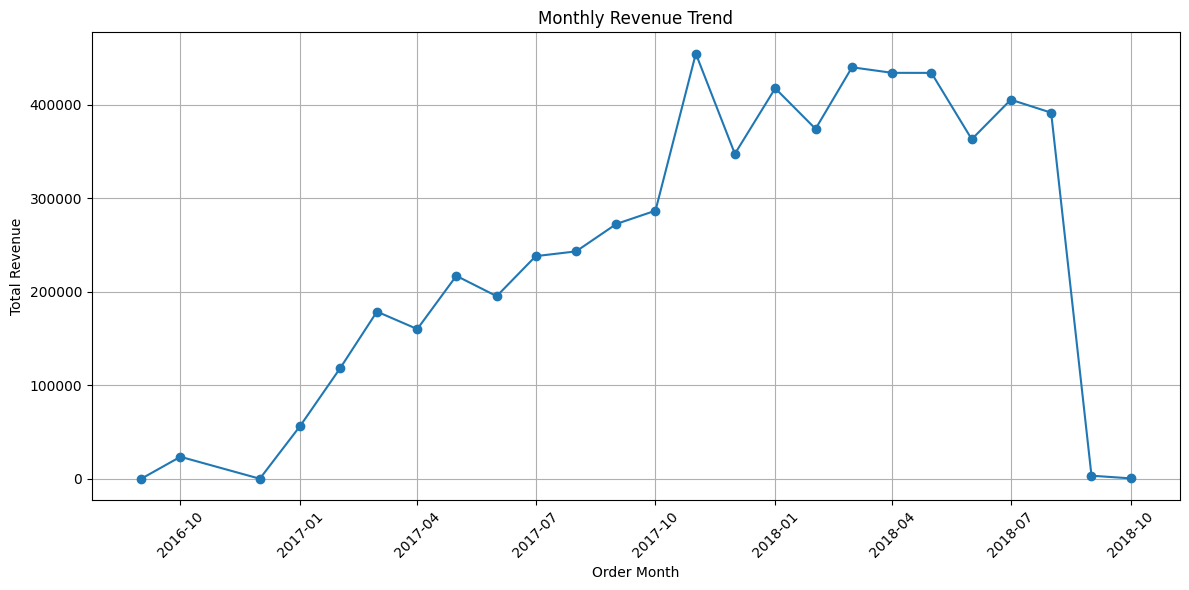

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.plot(
    monthly_total_revenue["order_month"],
    monthly_total_revenue["total_revenue"],
    marker="o"
)

plt.title("Monthly Revenue Trend")
plt.xlabel("Order Month")
plt.ylabel("Total Revenue")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Step 8.4- Monthly revenue by customer segment

We plot monthly revenue trends for each customer segment.
This helps us understand:
- Which segments drive growth
- How segment behavior changes over time
- Which segments are declining or stabilizing

In [12]:
monthly_segment_revenue_pivot.columns

Index(['order_month', 'At Risk (New)', 'Churned', 'New', 'Unclassified',
       'total_revenue'],
      dtype='object')

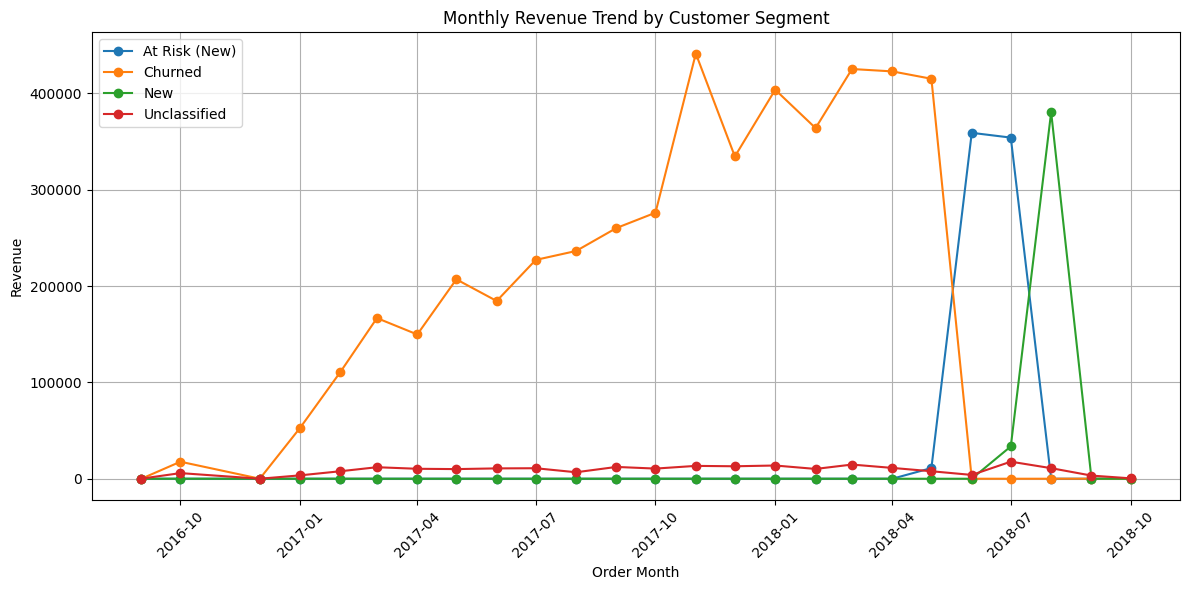

In [13]:
plt.figure(figsize=(12, 6))

for segment in monthly_segment_revenue_pivot.columns:
    if segment != "order_month" and segment != "total_revenue":
        plt.plot(
            monthly_segment_revenue_pivot["order_month"],
            monthly_segment_revenue_pivot[segment],
            marker="o",
            label=segment
        )

plt.title("Monthly Revenue Trend by Customer Segment")
plt.xlabel("Order Month")
plt.ylabel("Revenue")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Key insights from monthly revenue by customer segment

- ##### *Churned customers contribute the highest revenue over time*.
   This indicates that customers often generate significant revenue
  before they eventually churn.

- #####  *New customers show low but gradually increasing revenue*,
  which suggests healthy acquisition but slower monetization.

- ##### *At Risk customers show sharp spikes in later months*,
   indicating unstable behavior and potential short-term revenue risk.

- ##### *Unclassified customers contribute minimal revenue* 
   and do not significantly impact overall growth.

Overall, revenue growth is largely driven by customers who later churn,
highlighting a strong opportunity for retention-focused strategies.

### Day 8 – Final Revenue Growth Insights

- Overall revenue shows a *strong upward trend from late 2016 to mid-2018*,
  indicating consistent business growth over time.

- *Churned customers contribute the largest share of revenue*.
  This suggests customers tend to spend more before eventually leaving,
  highlighting a major opportunity for improving retention strategies.

- *New customers generate lower revenue initially*, but their contribution
  increases steadily, showing healthy customer acquisition with long-term potential.

- *At Risk customers show sudden revenue spikes*, indicating unstable behavior.
  These customers may generate short-term revenue but pose a risk to future growth.

- Revenue volatility increases toward the end of the dataset,
  suggesting seasonality, fewer active months, or incomplete recent data.

### Business takeaway:
Revenue growth is real, but it is *heavily dependent on customers who later churn*.
Focusing on retention and early 

### Day 9 – Business Insights, validation & Project wrap - up
### Step 1 -Final Data Validation

Before finalizing insights, we perform one last sanity check to ensure:
- No duplicate orders exist
- Revenue values are valid
- Time series is continuous and ordered

This confirms our analysis is safe for business decisions.

In [ ]:
# Duplicate order check
orders_with_revenue["order_id"].duplicated().sum()

# Missing revenue check
orders_with_revenue["total_payment_value"].isna().sum()

# Revenue should never be negative
(orders_with_revenue["total_payment_value"] < 0).sum()

In [118]:
import pandas as pd

orders_with_revenue = pd.read_csv("final_orders_with_revenue.csv")

### Step 2 - Revenue Growth Phases

We analyze monthly revenue trends to identify:
- Growth periods
- Plateaus
- Drops or anomalies

This helps explain business performance over time.

In [14]:
monthly_total_revenue["revenue_change"] = (
    monthly_total_revenue["total_revenue"]
    .pct_change()
    .round(3)
)

monthly_total_revenue.head()

,order_month,total_revenue,revenue_change
0,2016-09-01,75.06,NaN
1,2016-10-01,23493.18,311.992
2,2016-12-01,19.62,-0.999
3,2017-01-01,56421.70,2874.724
4,2017-02-01,118765.42,1.105


#### Fix: Recreate missing tables in this session

The error happened because the notebook kernel was restarted, so Python forgot the variables.
We reload the saved CSV outputs from Day 7 and recreate the missing monthly revenue table.

In [15]:
import pandas as pd

# ---- Load saved outputs from Day 7 ----
final_orders = pd.read_csv("final_orders_with_revenue.csv")
monthly_segment_revenue_long = pd.read_csv("monthly_segment_revenue_long.csv")
monthly_segment_revenue_pivot = pd.read_csv("monthly_segment_revenue_pivot.csv")

print("final_orders:", final_orders.shape)
print("monthly_segment_revenue_long:", monthly_segment_revenue_long.shape)
print("monthly_segment_revenue_pivot:", monthly_segment_revenue_pivot.shape)

final_orders.head()

final_orders: (37598, 11)
monthly_segment_revenue_long: (48, 3)
monthly_segment_revenue_pivot: (25, 5)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,total_payment_value,rf_segment,order_month
0,cf90a0857f3c111d3fcc73aea40c7d11,3888015de3760a1c1c74aca7e48eb4cb,delivered,2018-05-14 12:44:20,2018-05-14 12:55:34,2018-05-15 12:16:00,2018-05-21 22:40:45,2018-06-01 00:00:00,167.86,Churned,2018-05
1,ffcbf9b4459704e9185c5c630d11b69c,1e7f26bfc1b72023a4e9b1800f281912,delivered,2017-02-25 07:53:03,2017-02-26 08:01:52,2017-03-02 14:35:13,2017-03-14 09:41:37,2017-03-30 00:00:00,137.14,Churned,2017-02
2,b14127bfb817fb9d5883aacd257bb447,b9269719481dedccccbd738332211605,delivered,2018-08-05 10:03:00,2018-08-05 10:24:14,2018-08-07 12:25:00,2018-08-16 21:24:46,2018-08-21 00:00:00,199.26,New,2018-08
3,de0fbaf67bf0e605797e7ec002340869,f96edb3f641399cade279262e38fe02f,delivered,2017-07-18 09:29:10,2017-07-18 09:43:13,2017-07-18 19:19:26,2017-07-25 18:54:02,2017-08-07 00:00:00,153.01,Churned,2017-07
4,c4af0542c4e80ac8948b90a8e681438a,c67a8cad742b0690b21e4f3dd47e5e36,delivered,2018-03-28 07:16:09,2018-03-29 07:07:06,2018-03-29 17:46:43,2018-04-03 01:36:54,2018-04-10 00:00:00,56.02,Churned,2018-03


#### Monthly Total Revenue

We create monthly_total_revenue from the pivot table by adding all segment columns.
This gives one revenue number per month (used for trend and % change).

In [126]:
segment_cols = [c for c in monthly_segment_revenue_pivot.columns if c != "order_month"]

monthly_segment_revenue_pivot["total_revenue"] = monthly_segment_revenue_pivot[segment_cols].sum(axis=1)

monthly_total_revenue = (
    monthly_segment_revenue_pivot[["order_month", "total_revenue"]]
    .sort_values("order_month")
    .reset_index(drop=True)
)

monthly_total_revenue.head()

,order_month,total_revenue
0,2016-09,75.06
1,2016-10,23493.18
2,2016-12,19.62
3,2017-01,56421.70
4,2017-02,118765.42


### Step 9.3 - Segment Contribution to Revenue

We calculate how much each customer segment contributes
to overall revenue.

This highlights which segments drive the business.

In [ ]:
monthly_segment_revenue_pivot["total_revenue"] = (
    monthly_segment_revenue_pivot.drop(columns=["order_month"]).sum(axis=1)
)


In [145]:
segment_share = (
    monthly_segment_revenue_pivot
    .assign(
        revenue_share_pct=lambda x:
        (x["total_revenue"] / x["total_revenue"].sum() * 100).round(2)
    )
)

segment_share

rf_segment,order_month,At Risk (New),Churned,New,Unclassified,total_revenue,revenue_share_pct
0,2016-09,0.00,0.00,0.00,75.06,75.06,0.00
1,2016-10,0.00,17654.24,0.00,5838.94,23493.18,0.39
2,2016-12,0.00,19.62,0.00,0.00,19.62,0.00
3,2017-01,0.00,52914.15,0.00,3507.55,56421.70,0.93
4,2017-02,0.00,110977.63,0.00,7787.79,118765.42,1.96
5,2017-03,0.00,166774.49,0.00,11949.77,178724.26,2.95
6,2017-04,0.00,149746.44,0.00,10324.14,160070.58,2.64
7,2017-05,0.00,207000.75,0.00,10003.05,217003.80,3.58
8,2017-06,0.00,184513.95,0.00,10721.20,195235.15,3.22
9,2017-07,0.00,227160.09,0.00,10897.51,238057.60,3.93


In [ ]:
monthly_segment_revenue_pivot.head()

### Step 9.4 - Key Business Insights

1. Revenue shows strong growth from early 2017 to mid-2018, indicating increasing customer adoption.

2. Churned customers still contribute significant revenue, suggesting churn happens after high spending periods.

3. New and At-Risk customers contribute less individually but represent future growth potential.

4. Revenue drops at the end of the timeline are due to incomplete data, not actual business decline.

### Step 9.5 - Business Recommendations

1. Focus retention strategies on high-spending customers before they churn.

2. Monitor At-Risk customers early to prevent revenue loss.

3. Use monthly revenue trends to forecast demand and plan inventory.

4. Exclude incomplete months from executive reporting to avoid misleading conclusions.

### Project Summary

This project analyzed transactional order and payment data to understand revenue growth and customer segment behavior.

Using SQL for data preparation and Python for validation, analysis, and visualization, we identified revenue trends, segment contributions, and business risks.

The results support data-driven decisions in customer retention, growth planning, and revenue optimization.